<a href="https://colab.research.google.com/github/Satyam-kumar-yadav/StumbleUpon-Classification-/blob/main/StumbleUpon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
### importing drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# !unzip '/content/gdrive/MyDrive/BCG/stumbleupon.zip' -d '/content/gdrive/MyDrive/BCG'

Archive:  /content/gdrive/MyDrive/BCG/stumbleupon.zip
  inflating: /content/gdrive/MyDrive/BCG/raw_content.zip  
  inflating: /content/gdrive/MyDrive/BCG/sampleSubmission.csv  
  inflating: /content/gdrive/MyDrive/BCG/test.tsv  
  inflating: /content/gdrive/MyDrive/BCG/train.tsv  


In [2]:
### libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
### Config File 
train = '/content/gdrive/MyDrive/BCG/train.tsv'
test = '/content/gdrive/MyDrive/BCG/test.tsv'
sample = '/content/gdrive/MyDrive/BCG/sampleSubmission.csv'

In [4]:
train_df = pd.read_csv(train,sep='\t')
train_df.head(5)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,0.203490,0.088652,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,0.226402,0.120536,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,0.095861,0,0.265656,0.035343,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0,0.024908,0,0.228887,0.050473,1,1,14,0,12032,162,10,0.098765,0.082569,0


In [5]:
test_df = pd.read_csv(test,sep='\t')
test_df.head(5)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
0,http://www.lynnskitchenadventures.com/2009/04/...,5865,"{""title"":""Homemade Enchilada Sauce Lynn s Kitc...",recreation,0.443906,2.558140,0.389706,0.257353,0.044118,0.022059,0.489572,0.0,0,0.067143,0,0.230285,0.199438,1,1,15,0,5643,136,3,0.242647,0.080597
1,http://lolpics.se/18552-stun-grenade-ar,782,"{""title"":""lolpics Stun grenade ar "",""body"":"" f...",culture_politics,0.135844,3.771429,0.461538,0.205128,0.051282,0.000000,0.782051,0.0,0,0.042857,0,0.365962,0.080000,?,1,62,0,382,39,2,0.128205,0.176471
2,http://www.xcelerationfitness.com/treadmills.html,6962,"{""title"":""Treadmills "",""body"":"" treadmills, st...",?,?,2.269565,0.495726,0.384615,0.170940,0.170940,1.250000,0.0,0,0.058824,0,0.161901,10.000000,?,1,42,0,2420,117,1,0.581197,0.125000
3,http://www.bloomberg.com/news/2012-02-06/syria...,7640,"{""title"":""Father s Tactics Used by Assad to Cr...",culture_politics,0.90259,2.523490,0.705502,0.346278,0.122977,0.090615,0.449366,0.0,0,0.058081,0,0.146593,0.005964,1,1,41,0,5559,309,10,0.038835,0.063126
4,http://www.wired.com/gadgetlab/2011/12/stem-tu...,3589,"{""title"":""Stem Turns Lemons and Limes Into Jui...",science_technology,0.486363,1.848000,0.470968,0.161290,0.032258,0.000000,0.453757,0.0,0,0.093023,0,0.244141,0.035714,1,0,34,0,2209,155,10,0.096774,0.065341


In [6]:
### Sample Submission
sampleSub = pd.read_csv(sample)
sampleSub.head(5)

,urlid,label
0,5865,0
1,782,0
2,6962,0
3,7640,0
4,3589,0


In [7]:
xtrain_df  = pd.DataFrame({
    'boilerplate': train_df.boilerplate.values,
    'label': train_df.label.values
})

In [8]:
xtrain_df.head(5)

,boilerplate,label
0,"{""title"":""IBM Sees Holographic Calls Air Breat...",0
1,"{""title"":""The Fully Electronic Futuristic Star...",1
2,"{""title"":""Fruits that Fight the Flu fruits tha...",1
3,"{""title"":""10 Foolproof Tips for Better Sleep ""...",1
4,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",0


In [9]:
print(xtrain_df.iloc[2,0])

{"title":"Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health","body":"Apples The most popular source of antioxidants in our diet one apple has an antioxidant effect equivalent to 1 500 mg of vitamin C Apples are loaded with protective flavonoids which may prevent heart disease and cancer Next Papayas With 250 percent of the RDA of vitamin C a papaya can help kick a cold right out of your system The beta carotene and vitamins C and E in papayas reduce inflammation throughout the body lessening the effects of asthma Next Cranberries Cranberries have more antioxidants than other common fruits and veggies One serving has five times the amount in broccoli Cranberries are a natural probiotic enhancing good bacteria levels in the gut and protecting it from foodborne illnesses Next Grapefruit Loaded with vitamin C grapefruit also contains natural compounds called limonoids which can lower cholesterol The red varieties are a potent source of the cancer fighting subs

In [10]:
xtrain_df.shape

(7395, 2)

In [71]:
xtrain_df.isnull().sum()

boilerplate    0
label          0
dtype: int64

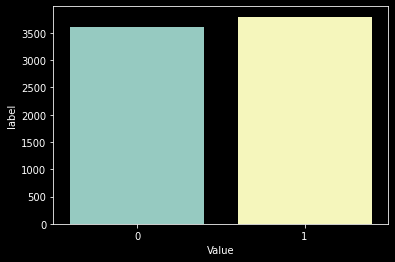

In [221]:
plt.style.use('dark_background')
sns.countplot(x='label',data=xtrain_df)
plt.xlabel('Value')
plt.ylabel('label')
plt.show()

In [ ]:
X = []
for items in xtrain_df['boilerplate']:
    X.append(items)

In [ ]:
from wordcloud import  WordCloud ,STOPWORDS

In [ ]:
commonWord = ' '.join(X)
wordcloud = WordCloud(stopwords=STOPWORDS,height=2500,width=3000).generate(commonWord)

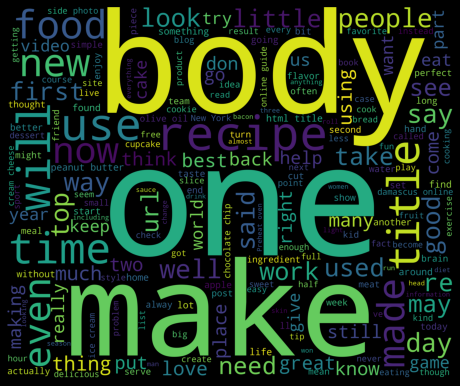

In [ ]:
plt.figure(1,figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
del X, wordcloud

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X = xtrain_df.boilerplate.values
Y = xtrain_df.label.values
x_train,x_val,y_train,y_val = train_test_split(X,Y, test_size = 0.1 , random_state = 2021)

In [74]:
import torch
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(torch.cuda.get_device_name(0))

Tesla P100-PCIE-16GB


In [75]:
!pip install transformers

In [76]:
import string

Since I can't use greater then 512 len so I decided to preprocess the else it is not needed for the Bert model

In [77]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
from nltk.corpus import stopwords
en_stops = stopwords.words('english')
def remove_stop(text):
  return ' '.join([i for i in text.split() if i not in en_stops])

In [79]:
### Simple Preprocessing 
def processed_word(text):
  text = remove_stop(text)
  return ''.join([i for i in text if i not in string.punctuation ])
a = X[0]
print("Not processed :" ,a)
print("processed word :" ,processed_word(a))

Not processed : {"title":"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries","body":"A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose California Photographer Tony Avelar Bloomberg By 2015 your mobile phone will project a 3 D image of anyone who calls and your laptop will be powered by kinetic energy At least that s what International Business Machines Corp sees in its crystal ball The predictions are part of an annual tradition for the Armonk New York based company which surveys its 3 000 researchers to find five ideas expected to take root in the next five years IBM the world s largest provider of computer services looks to Silicon Valley for input gleaning many ideas from its Almaden research cen

In [80]:
### using based berttokenizer 
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case = True)

In [81]:
Max_len = 325

In [82]:
def preprocess_from_bert(data):
  input_ids = []
  attention_mask = []

  for item in data:
    token = tokenizer.encode_plus(
        text = processed_word(item),
        add_special_tokens=True,
        max_length = Max_len,
        # padding = 'max_length',
        pad_to_max_length = True,
        truncation = True,
        return_attention_mask =True,
    )
    input_ids.append(token.get('input_ids') )
    attention_mask.append(token.get('attention_mask'))
    
  input_ids = torch.tensor(input_ids)
  attention_mask = torch.tensor(attention_mask)

  return input_ids , attention_mask

In [83]:
print(X[0])
token_ids = list(preprocess_from_bert([X[0]]))[0]
print("preprocessed word : " , token_ids)

{"title":"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries","body":"A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose California Photographer Tony Avelar Bloomberg By 2015 your mobile phone will project a 3 D image of anyone who calls and your laptop will be powered by kinetic energy At least that s what International Business Machines Corp sees in its crystal ball The predictions are part of an annual tradition for the Armonk New York based company which surveys its 3 000 researchers to find five ideas expected to take root in the next five years IBM the world s largest provider of computer services looks to Silicon Valley for input gleaning many ideas from its Almaden research center in San Jose 

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [84]:
train_inputs,train_masks = preprocess_from_bert(x_train)
val_inputs,val_masks = preprocess_from_bert(x_val)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [85]:
train_masks.shape

torch.Size([6655, 325])

In [86]:
##### DataLoader for train and validation dataset
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)
batch_size = 32
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)


In [87]:
import torch
import torch.nn as nn
from transformers import BertModel
import torch.nn.functional as F

**Model**

In [117]:
#### using pretrained model for classification
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    def __init__(self, freeze_bert=False):
        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.fn = nn.Linear(768,80)
        self.fn1 = nn.Linear(80,2)
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        last_hidden_state_cls = outputs[0][:, 0, :]
        x = F.tanh(self.fn(last_hidden_state_cls))
        logits = self.fn1(x)
        return logits

In [118]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs):
    bert_classifier = BertClassifier(freeze_bert=False)
    bert_classifier.to(device)
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )
    total_steps = len(train_dataloader) * epochs
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, 
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [119]:
import random
import time
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=2, evaluation=False):
    for epoch_i in range(epochs):
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)
        t0_epoch, t0_batch = time.time(), time.time()
        total_loss, batch_loss, batch_counts = 0, 0, 0
        model.train()
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)
            model.zero_grad()
            logits = model(b_input_ids, b_attn_mask)
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                time_elapsed = time.time() - t0_batch
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        if evaluation == True:
            val_loss, val_accuracy = evaluate(model, val_dataloader)
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)

def evaluate(model, val_dataloader):
    model.eval()
    val_accuracy = []
    val_loss = []
    for batch in val_dataloader:
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())
        preds = torch.argmax(logits, dim=1).flatten()
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [120]:
### training the model
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, train_dataloader, val_dataloader, epochs=2, evaluation=True)

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


   1    |   20    |   0.515964   |     -      |     -     |   21.74  
   1    |   40    |   0.436053   |     -      |     -     |   20.71  
   1    |   60    |   0.453246   |     -      |     -     |   20.75  
   1    |   80    |   0.441754   |     -      |     -     |   20.67  
   1    |   100   |   0.443257   |     -      |     -     |   20.72  
   1    |   120   |   0.483301   |     -      |     -     |   20.63  
   1    |   140   |   0.432943   |     -      |     -     |   20.75  
   1    |   160   |   0.435679   |     -      |     -     |   20.70  
   1    |   180   |   0.469676   |     -      |     -     |   20.70  
   1    |   200   |   0.451460   |     -      |     -     |   20.75  
   1    |   207   |   0.490740   |     -      |     -     |   7.20   
----------------------------------------------------------------------
   1    |    -    |   0.457778   |  0.394861  |   82.94   |  223.13  
----------------------------------------------------------------------
 Epoch  |  Batch  

In [204]:
### prediction on val dataset
probs = bert_predict(bert_classifier, val_dataloader)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1628: UserWarning:

nn.functional.tanh is deprecated. Use torch.tanh instead.



In [205]:
preds = probs[:, 1]
preds.shape

(740,)

In [210]:
from sklearn.metrics import precision_recall_curve,confusion_matrix,precision_score,recall_score,f1_score
import plotly.express as px
import plotly.graph_objects as go
precision,recall,thresolds = precision_recall_curve(y_val,preds)

In [207]:
y_pred = np.where(preds >= 0.5, 1, 0)

In [228]:
print("Precision: %f "%precision_score(y_val, y_pred))
print("="*40)
print("Recall: %f "%recall_score(y_val, y_pred))
print("="*40)
print("F1: %f"% f1_score(y_val, y_pred))
print("="*40)
print("Let's see the confuision matrix:\n",confusion_matrix(y_val, y_pred))
print("="*40)

Precision: 0.819843 
Recall: 0.826316 
F1: 0.823067
Let's see the confuision matrix:
 [[291  69]
 [ 66 314]]


In [212]:
fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()


In [213]:
conf_matrix = confusion_matrix(y_val, y_pred)
trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
                        showscale  = False, )
fig = go.Figure(trace1)
fig.show()

In [123]:
#### Loading Test DataSet
def bert_predict(model, test_dataloader):
    model.eval()
    all_logits = []
    for batch in test_dataloader:
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    all_logits = torch.cat(all_logits, dim=0)
    probs = F.softmax(all_logits, dim=1).cpu().numpy()
    return probs

In [124]:
test_inputs, test_masks = preprocess_from_bert(test_df.boilerplate.values)

test_dataset = TensorDataset(test_inputs, test_masks)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=32)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [218]:
probs = bert_predict(bert_classifier, test_dataloader)

threshold = 0.6
preds = np.where(probs[:, 1] > threshold, 1, 0)

print("Number of evergreen text:", preds.sum())

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1628: UserWarning:

nn.functional.tanh is deprecated. Use torch.tanh instead.



Number of evergreen text: 1464


In [196]:
sampleSub['label'] = preds

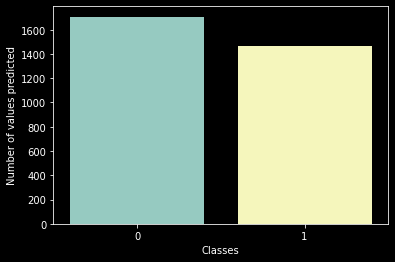

In [223]:
sns.countplot(x='label',data=sampleSub)
plt.xlabel('Classes')
plt.ylabel('Number of values predicted')
plt.show()

In [105]:
sampleSub.set_index('urlid',inplace=True)

In [194]:
sampleSub.to_csv('newSub.csv')